In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
num_classes = 2

In [4]:
from tensorflow.keras.optimizers import Adam

In [5]:
# load the ResNet50 model and add a few layers on top
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

94765736/94765736 [==============================] - 25s 0us/step


In [6]:
for layer in model.layers[0].layers:
    layer.trainable = False

In [7]:
# compile the model
model.compile(optimizer=Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\matin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
# define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_dir = r"C:\Users\matin\Downloads\dataset\train"
val_dir = r"C:\Users\matin\Downloads\dataset\test"

In [11]:
# create the generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 840 images belonging to 2 classes.


In [12]:
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 188 images belonging to 2 classes.


In [13]:
# train the model
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              steps_per_epoch=len(train_generator),
                              validation_steps=len(validation_generator))

C:\Users\matin\AppData\Local\Temp\ipykernel_12436\2123495152.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
27/27 [==============================] - 304s 11s/step - loss: 0.9078 - accuracy: 0.4917 - val_loss: 0.6981 - val_accuracy: 0.5160
Epoch 2/10
27/27 [==============================] - 254s 9s/step - loss: 0.8050 - accuracy: 0.4643 - val_loss: 0.6975 - val_accuracy: 0.5160
Epoch 3/10
27/27 [==============================] - 267s 10s/step - loss: 0.7351 - accuracy: 0.5214 - val_loss: 0.6867 - val_accuracy: 0.5213
Epoch 4/10
27/27 [==============================] - 259s 10s/step - loss: 0.6994 - accuracy: 0.5321 - val_loss: 0.6885 - val_accuracy: 0.4840
Epoch 5/10
27/27 [==============================] - 246s 9s/step - loss: 0.7153 - accuracy: 0.5036 - val_loss: 0.6979 - val_accuracy: 0.5160
Epoch 6/10
27/27 [==============================] - 243s 9s/step - loss: 0.7099 - accuracy: 0.5000 - val_loss: 0.6863 - val_accuracy: 0.5532
Epoch 7/10
27/27 [==============================] - 265s 10s/step - loss: 0.7009 - accuracy: 0.4893 - val_loss: 0.6900 - val_accuracy: 0.4840
Epoch 8/1

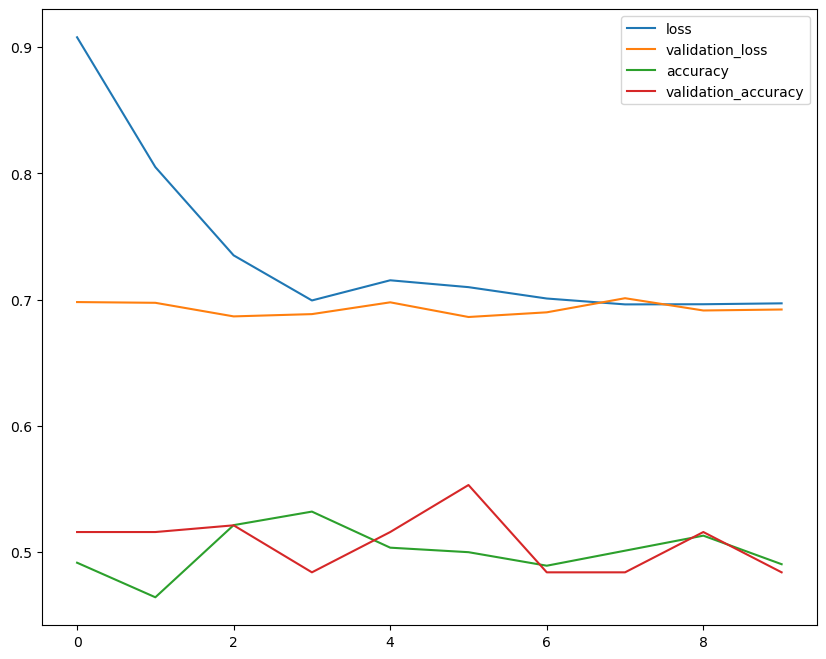

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,8))
plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

In [61]:
# define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "/content/train_data"
val_dir = "/content/test_data"


In [62]:
# create the generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')
# create the generators for the training, validation, and test sets
val_generator = validation_datagen.flow_from_directory(val_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 1000 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [77]:
# train the model
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              steps_per_epoch=len(train_generator),
                              validation_steps=len(validation_generator))

<ipython-input-77-6f2983b35166>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
32/32 [==============================] - 27s 690ms/step - loss: 0.9639 - accuracy: 0.5140 - val_loss: 0.6997 - val_accuracy: 0.5038
Epoch 2/10
32/32 [==============================] - 20s 625ms/step - loss: 0.7480 - accuracy: 0.5080 - val_loss: 0.6586 - val_accuracy: 0.5731
Epoch 3/10
32/32 [==============================] - 20s 636ms/step - loss: 0.6993 - accuracy: 0.5630 - val_loss: 0.6605 - val_accuracy: 0.5731
Epoch 4/10
32/32 [==============================] - 20s 627ms/step - loss: 0.6904 - accuracy: 0.5640 - val_loss: 0.6546 - val_accuracy: 0.6538
Epoch 5/10
32/32 [==============================] - 20s 607ms/step - loss: 0.6800 - accuracy: 0.5690 - val_loss: 0.6584 - val_accuracy: 0.6269
Epoch 6/10
32/32 [==============================] - 20s 619ms/step - loss: 0.6625 - accuracy: 0.5980 - val_loss: 0.6488 - val_accuracy: 0.6462
Epoch 7/10
32/32 [==============================] - 20s 627ms/step - loss: 0.6634 - accuracy: 0.5980 - val_loss: 0.6426 - val_accuracy: 0.6577

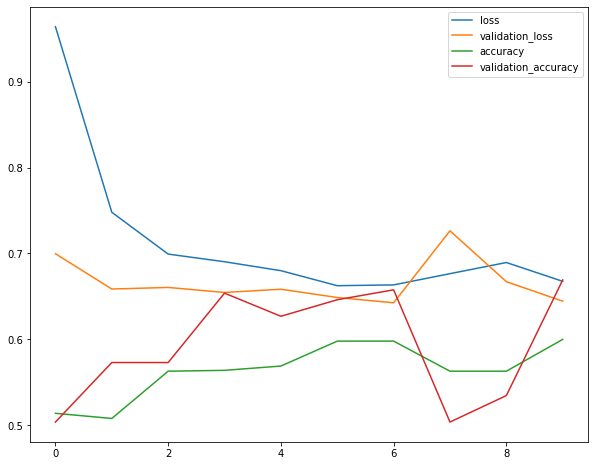

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,8))
plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

In [88]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
import Augmentor

In [90]:
p = Augmentor.Pipeline("/content/train_data")

Initialised with 1000 image(s) found.
Output directory set to /content/train_data/output.

In [ ]:
p.